In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/Users/micahbillouin/miniconda3/envs/deep/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys
/Users/micahbillouin/miniconda3/envs/deep/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Initial Dataframe Statistics

In [2]:
data = pd.read_pickle('data/SMU.pickle')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57068 entries, 0 to 57067
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ts        57068 non-null  object 
 1   y         57068 non-null  object 
 2   chan      57068 non-null  object 
 3   net       57068 non-null  object 
 4   station   57068 non-null  object 
 5   datetime  57068 non-null  object 
 6   hz        57068 non-null  float64
 7   dsize     57068 non-null  int64  
 8   evlo      57068 non-null  float64
 9   evla      57068 non-null  float64
 10  type      57068 non-null  object 
 11  stlo      57068 non-null  float64
 12  stla      57068 non-null  float64
 13  dist      57068 non-null  float64
 14  lbl       57068 non-null  int64  
 15  phase     57068 non-null  object 
 16  mag       0 non-null      object 
 17  depth     57068 non-null  int64  
dtypes: float64(6), int64(3), object(9)
memory usage: 7.8+ MB


In [3]:
data.head()

,ts,y,chan,net,station,datetime,hz,dsize,evlo,evla,type,stlo,stla,dist,lbl,phase,mag,depth
0,"[1.4992776862e-07, 1.54918878976e-07, 1.529371...","[0, 1]",BHZ,XD,A01,2011-09-12T20:40:13.765000Z,40.0,6,-112.8963,41.1312,RBD,-116.9214,32.578,1.014477e+06,1,I,None,0
1,"[4.79185014254e-08, 4.6731994128e-08, 4.537867...","[0, 1]",BHT,YX,A01,2011-09-12T20:40:13.770000Z,40.0,6,-112.8963,41.1312,RBD,-116.9214,32.578,1.014477e+06,1,I,None,0
2,"[-2.31064725335e-07, -2.30198857066e-07, -2.29...","[0, 1]",BHR,YX,A01,2011-09-12T20:40:13.770000Z,40.0,6,-112.8963,41.1312,RBD,-116.9214,32.578,1.014477e+06,1,I,None,0
3,"[2.8589605464e-08, 2.98575254651e-08, 3.057572...","[0, 1]",BHZ,YX,A01,2011-09-12T20:40:13.770000Z,40.0,6,-112.8963,41.1312,RBD,-116.9214,32.578,1.014477e+06,1,I,None,0
4,"[-1.24707152409e-07, -1.27273779492e-07, -1.23...","[0, 1]",BHT,XD,A01,2011-09-12T20:40:13.765000Z,40.0,6,-112.8963,41.1312,RBD,-116.9214,32.578,1.014477e+06,1,I,None,0


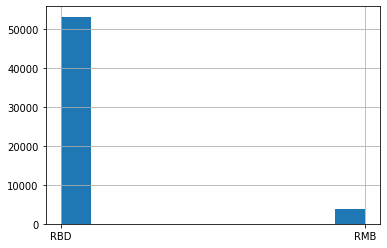

In [4]:
data.type.hist()

In [5]:
data.type.value_counts()

RBD    53257
RMB     3811
Name: type, dtype: int64

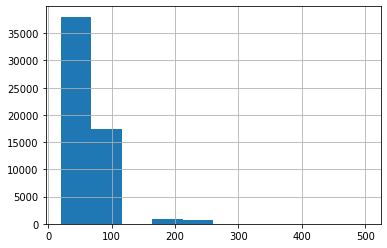

In [6]:
data.hz.hist()

In [7]:
print('Average sampling rate for both classes: ',data.hz.mean())

Average sampling rate for both classes:  63.7789128759


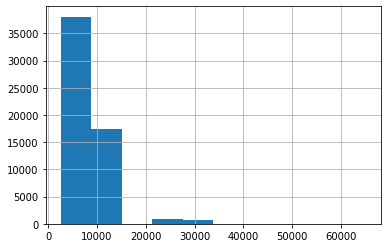

In [8]:
data['lens'] = data.ts.progress_apply(lambda x: len(x))
data.lens.hist()

In [9]:
data.type.replace(to_replace='RBD', value='UTTR', inplace=True)
data.type.replace(to_replace='RMB', value='RMT', inplace=True)

## Balance Classes

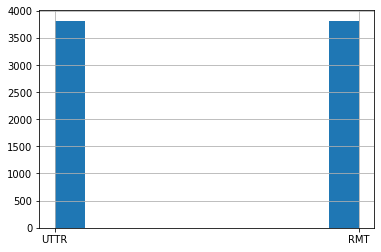

In [10]:
UTTR = data.loc[data['type'] == 'UTTR'].copy()

RMT = data.loc[data['type'] == 'RMT'].copy()

UTTR = UTTR.sample(frac=0.0716, replace=False, random_state=42)


smu_balanced = pd.concat([UTTR, RMT])
smu_balanced.type.hist()

In [11]:
smu_balanced.reset_index(inplace=True, drop=True)
# smu_balanced.to_pickle('data/smu_balanced.pickle')

## Resample SMU data

### Imbalanced

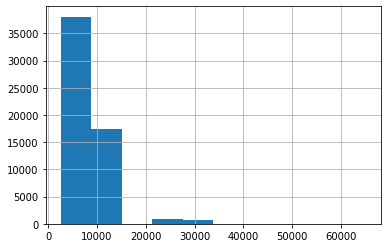

In [12]:
# View distrbution of sampling rates and lengths before resample
data.lens.hist()

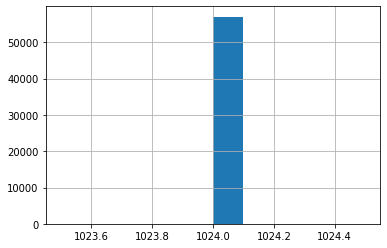

In [13]:
smu_resampled = data.drop(columns=['lens']).copy()

# ts, num=int(len(ts)*new_freq/samp_freq), t=None, axis=0, window=None)
to_length = 1024
smu_resampled['ts'] = smu_resampled.ts.progress_apply(lambda x: resample(x, num=to_length))

smu_resampled['lens'] = smu_resampled.ts.progress_apply(lambda x: len(x))
smu_resampled.lens.hist()


In [14]:
# def reassign(x):
#     x = 60
#     return(float(x))


# smu_resampled['hz'] = smu_resampled.hz.progress_apply(lambda x: reassign(x))
# smu_resampled.hz.hist()

In [15]:
# smu_resampled.to_pickle('data/smu_resampled_imbalanced.pickle')

### Balanced

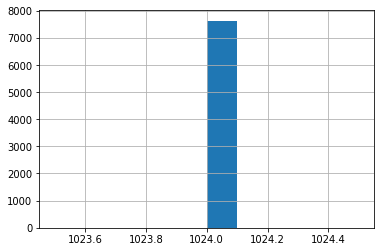

In [16]:
smu_balanced_resampled = smu_balanced.drop(columns=['lens']).copy()

to_length = 1024
smu_balanced_resampled['ts'] = smu_balanced_resampled.ts.progress_apply(lambda x: resample(x, to_length))

smu_balanced_resampled['lens'] = smu_balanced_resampled.ts.progress_apply(lambda x: len(x))
smu_balanced_resampled.lens.hist()

In [17]:
# smu_balanced_resampled['hz'] = smu_balanced_resampled.hz.progress_apply(lambda x: reassign(x))
# smu_balanced_resampled.hz.hist()

In [18]:
# smu_balanced_resampled.to_pickle('data/smu_resampled_balanced.pickle')